In [34]:
import pandas as pd
import numpy as np

# 中国平安股价
data = pd.read_csv('zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [35]:
price = data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [36]:
#归一化处理
price_norm = price/max(price)
print(price_norm)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


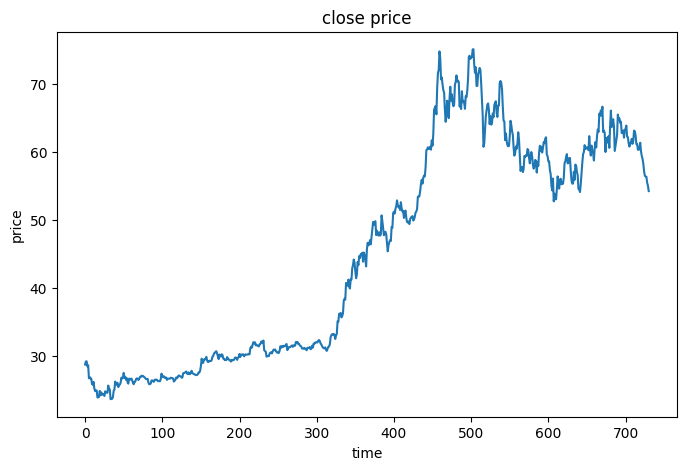

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [38]:
#define X and y
#define method to extract X and y
def extract_data(data,time_step):
    X = []
    y = []
    #0,1,2,3...9:10个样本；time_step=8;0,1...7;1,2...8;2,3...9三组（两组样本）
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0],X.shape[1],1)
    return X, y

In [39]:
time_step = 8

In [40]:
#define X and y
X,y = extract_data(price_norm,time_step)
print(X[0,:,:])
print(y)

[[0.38327341]
 [0.38926621]
 [0.38966573]
 [0.37954455]
 [0.3818085 ]
 [0.35637235]
 [0.35876948]
 [0.35583966]]
[0.3558396590757757, 0.3453189505926222, 0.3435876947662805, 0.34944732987082167, 0.33639632441070716, 0.33133573045678516, 0.3322679451325076, 0.33280063923292047, 0.3190837661472899, 0.31895059262218667, 0.32001598082301236, 0.3317352510320948, 0.3230789719003862, 0.3289386070049274, 0.3245438806765215, 0.325476095352244, 0.3248102277267279, 0.3217472366493541, 0.33093620988147554, 0.32987082168064985, 0.32813956585430815, 0.3282727393794113, 0.34225595951524834, 0.33599680383539754, 0.3347982421094686, 0.31548808096950326, 0.31735251032094813, 0.3161539485950193, 0.3194832867225995, 0.3317352510320948, 0.334398721534159, 0.3499800239712345, 0.34332134771607403, 0.34665068584365427, 0.34771607404447996, 0.3391929684378745, 0.3431881741909708, 0.34412038886669327, 0.3474497269942735, 0.3577040884272206, 0.3559728326008789, 0.35757091490211745, 0.36702623518444527, 0.3573045

In [41]:
print(X.shape,len(y))

(723, 8, 1) 723


In [42]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
#add RNN layer
model.add(SimpleRNN(units=5, input_shape=(time_step,1),activation='relu'))
#add output layer
model.add(Dense(units=1,activation='linear'))
#configure the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [43]:
#y格式转化
y = np.array(y)
y.shape

(723,)

In [ ]:
#train the model
model.fit(X,y,batch_size=30,epochs=200)

In [ ]:
#make prediction based on the training data
y_train_predict = model.predict(X)*max(price)
y_train = [i*max(price) for i in y]
print(y_train_predict,y_train)

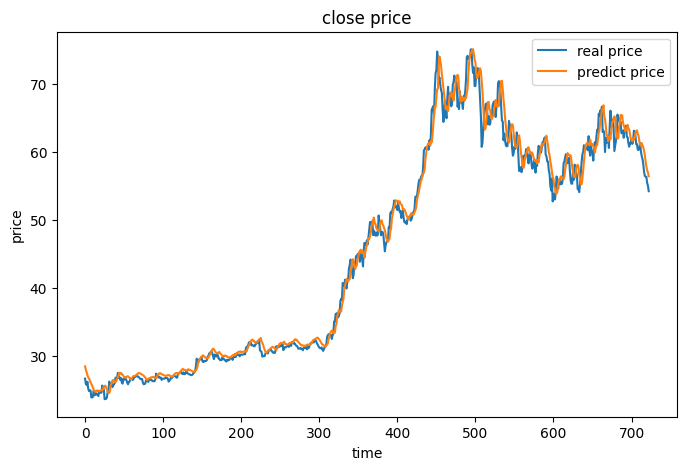

In [46]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [47]:
#有的小伙伴训练一次以后发现预测出来的结果不理想，很可能是模型进行初始化的时候选取的随机系数不合适，导致梯度下降搜索时遇到了局部极小值
#解决办法：尝试再次建立模型并训练
#多层感知机结构在进行模型求解时，会给定一组随机的初始化权重系数，这种情况是正常的。通常我们可以观察损失函数是否在变小来发现模型求解是否正常

In [48]:
data_test = pd.read_csv('zgpa_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()
price_test_norm = price_test/max(price)
#extract X_test and y_test
X_test_norm, y_test_norm = extract_data(price_test_norm,time_step)
print(X_test_norm.shape,len(y_test_norm))

(174, 8, 1) 174


In [49]:
#make prediction based on the test data
y_test_predict = model.predict(X_test_norm)*max(price)
y_test = [i*max(price) for i in y_test_norm]

6/6 [==============================] - 0s 2ms/step


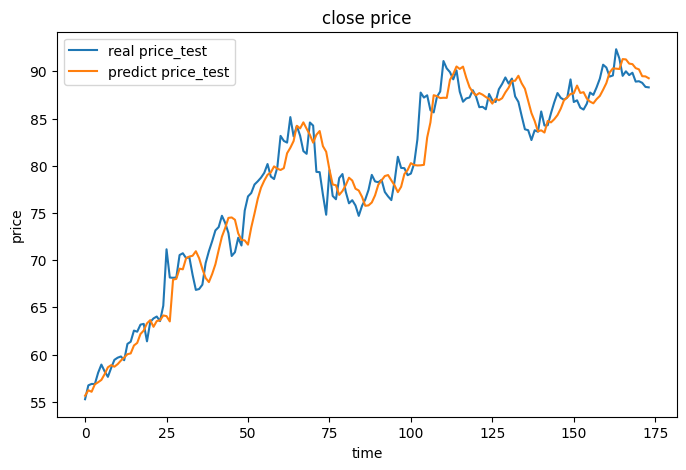

In [50]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [51]:
result_y_test = np.array(y_test).reshape(-1,1)
result_y_test_predict = y_test_predict
print(result_y_test.shape,result_y_test_predict.shape)
result = np.concatenate((result_y_test,result_y_test_predict),axis=1)
print(result.shape)
result = pd.DataFrame(result,columns=['real_price_test','predict_price_test'])
result.to_csv('zgpa_predict_test.csv')

(174, 1) (174, 1)
(174, 2)
